In [1]:
# -*- coding: utf-8 -*-
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the N_BaIoT dataset. 
# implemented Advanced Ensamble model (LightGBM) classification.

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
import numpy as np



In [2]:

df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT_Datasets/device7.csv')


# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115936 entries, 0 to 119999
Columns: 116 entries, MI_dir_L5_weight to label
dtypes: float64(115), int64(1)
memory usage: 103.5 MB


In [3]:

# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
4    20000
3    20000
6    20000
1    19623
5    18157
2    18156
Name: count, dtype: int64


In [4]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [5]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgbm = LGBMClassifier()

start_train_time = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train_time

start_pred_time = time.time()  
# Predict probabilities
y_pred = lgbm.predict(X_test)
pred_time = time.time() - start_pred_time

total_time = time.time() - start_time


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29241
[LightGBM] [Info] Number of data points in the train set: 81155, number of used features: 115
[LightGBM] [Info] Start training from score -1.776705
[LightGBM] [Info] Start training from score -1.856729
[LightGBM] [Info] Start training from score -1.767859
[LightGBM] [Info] Start training from score -1.754878
[LightGBM] [Info] Start training from score -1.852871
[LightGBM] [Info] Start training from score -1.747495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [6]:
print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:3.692591 seconds
Time taken for prediction: 0.155530 seconds
Total time taken:3.944219 seconds


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.999309968086024


In [8]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5892
           2       1.00      1.00      1.00      5481
           3       1.00      1.00      1.00      6147
           4       1.00      1.00      1.00      5966
           5       1.00      1.00      1.00      5433
           6       1.00      1.00      1.00      5862

    accuracy                           1.00     34781
   macro avg       1.00      1.00      1.00     34781
weighted avg       1.00      1.00      1.00     34781



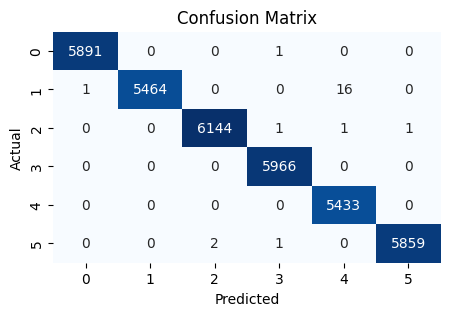

In [9]:
# Confusion matrix with string labels
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix with class labels
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()